<a href="https://colab.research.google.com/github/yegisafari/heart-disease/blob/main/VERSION2_Deep_Learning_Project_Heart_Diseas_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project of Programming with Python**

# Yeganeh Safari

Throughout history, many diseases have caused lots of suffering and death. Nowadays, heart disease is a big worry for our health. Things like smoking, eating too much, and not exercising can make it even worse. Heart disease can be tricky because it often happens without warning signs. That's why it's super important to find ways to detect it early, using basic information and symptoms. I used the method called ensemble learning to look at some data, and I found some interesting results.

I tried to use different methods including CNN-LSTM and CNN-GRU and some data analysis and visualization workflows to explore and communicate insights from data.

I read two papers that I thought might help me:


1) https://www.mdpi.com/2075-4418/12/12/3215


2)https://tc.copernicus.org/articles/16/1447/2022/tc-16-1447-2022.pdf

I got the dataset from KAGGLE:


https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## Preprocessing and Model Training Approach

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, GRU, Flatten
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 299
Number Of Columns : 13


In [ ]:
df.sample(1).iloc[0]

age                             50.0
anaemia                          1.0
creatinine_phosphokinase       168.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              1.0
platelets                   276000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                            11.0
DEATH_EVENT                      1.0
Name: 13, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
numerical_features = [column for column in df.columns if column != 'DEATH_EVENT']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_reshaped = X_train_preprocessed.reshape((X_train_preprocessed.shape[0], X_train_preprocessed.shape[1], 1))
X_test_reshaped = X_test_preprocessed.reshape((X_test_preprocessed.shape[0], X_test_preprocessed.shape[1], 1))

## Building the Hybrid Models

CNN-LSTM Model

In [ ]:
def create_cnn_lstm_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(units=50, activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

Train the CNN-LSTM Model

In [ ]:
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

cnn_lstm_model = create_cnn_lstm_model(input_shape)

cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.6992 - loss: 0.6811 - val_accuracy: 0.5833 - val_loss: 0.6860
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6802 - loss: 0.6599 - val_accuracy: 0.5833 - val_loss: 0.6966
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7271 - loss: 0.6246 - val_accuracy: 0.5833 - val_loss: 0.7262
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7267 - loss: 0.6277 - val_accuracy: 0.5833 - val_loss: 0.7155
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7081 - loss: 0.6245 - val_accuracy: 0.5833 - val_loss: 0.7069
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7240 - loss: 0.6105 - val_accuracy: 0.5833 - val_loss: 0.7092
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7162 - loss: 0.6079 - val_accuracy: 0.5833 - val_loss: 0.7101
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7116 - loss: 0.6146 - val_accuracy: 0.5833 - val_loss

CNN-GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

def create_cnn_gru_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(units=50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

Train the CNN-GRU Model

In [ ]:
cnn_gru_model = create_cnn_gru_model(input_shape=(X_train.shape[1], 1))
cnn_gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_gru_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5487 - loss: 984.2076 - val_accuracy: 0.4167 - val_loss: 2300.1260
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3018 - loss: 2132.4695 - val_accuracy: 0.5833 - val_loss: 1948.1082
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6955 - loss: 1515.7139 - val_accuracy: 0.5833 - val_loss: 1155.2271
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5445 - loss: 495.9777 - val_accuracy: 0.5833 - val_loss: 444.8498
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6919 - loss: 338.2397 - val_accuracy: 0.4167 - val_loss: 316.2082
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4505 - loss: 861.2134 - val_accuracy: 0.5833 - val_loss: 1644.7798
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6923 - loss: 859.7563 - val_accuracy: 0.4167 - val_loss: 287.0117
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3443 - loss: 672.5083 - val_ac

Ensemble Model

In [ ]:
predictions_lstm = cnn_lstm_model.predict(X_test).flatten()
predictions_gru = cnn_gru_model.predict(X_test).flatten()

ensemble_predictions = (predictions_lstm + predictions_gru) / 2
ensemble_predictions_binary = [1 if pred > 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
from sklearn.metrics import accuracy_score
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions_binary)
print(f'Ensemble Model Accuracy: {ensemble_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Ensemble Model Accuracy: 0.5833333333333334


In [ ]:
test_loss, test_accuracy = cnn_lstm_model.evaluate(X_test_reshaped, y_test, verbose=1)

print(f'Test Accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6743 - loss: 1.0146 
Test Accuracy: 0.6833333373069763


I wanted to improve my accuracy :

Recursive Feature Elimination with Cross-Validation (RFECV) for feature selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

y_train_converted = np.array(y_train).astype(int)

selector = RFECV(estimator=RandomForestClassifier(), step=1, cv=5)
X_train_selected = selector.fit_transform(X_train_preprocessed, y_train_converted)

Hyperparameter Tuning

In [ ]:
import shutil
shutil.rmtree('my_dir/keras_tuner_cnn_lstm/', ignore_errors=True)

In [ ]:
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='heart_fail'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:25: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.



In [ ]:
!pip install keras-tuner
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import InputLayer

class CNNLSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(InputLayer(input_shape=self.input_shape))
        model.add(Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=32),
                         kernel_size=hp.Choice('kernel_size', values=[2, 3, 4]),
                         activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(LSTM(units=hp.Int('units', min_value=20, max_value=100, step=20), activation='relu'))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

hypermodel = CNNLSTMHyperModel(input_shape=(X_train_reshaped.shape[1], 1))

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_cnn_lstm'
)

tuner.search(X_train_reshaped, y_train, epochs=10, validation_split=0.2, verbose=1)

Trial 10 Complete [00h 00m 21s]
val_accuracy: 0.75

Best val_accuracy So Far: 0.7916666865348816
Total elapsed time: 00h 03m 29s


Model Evaluation

In [ ]:
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(best_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 60)                  │          34,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,773 (135.83 KB)

 Trainable params: 34,773 (135.83 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

test_loss, test_accuracy = best_model.evaluate(X_test_reshaped, y_test, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6514 - loss: 0.6386
Test Accuracy: 0.6333333253860474


 Hyperparameter Tuning with Keras Tuner for CNN-GRU Model

In [ ]:
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_cnn_gru_new_session'
)

tuner.search(X_train_reshaped, y_train, epochs=10, validation_split=0.2, verbose=1)

Reloading Tuner from my_dir/keras_tuner_cnn_gru_new_session/tuner0.json


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GRU, Flatten, Dropout, InputLayer
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

class CNNGRUHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential([
            InputLayer(input_shape=self.input_shape),
            Conv1D(
                filters=hp.Int('filters', min_value=32, max_value=128, step=32),
                kernel_size=hp.Choice('kernel_size', values=[2, 3, 4]),
                activation='relu'
            ),
            MaxPooling1D(pool_size=2),
            GRU(units=hp.Int('units', min_value=20, max_value=100, step=20), activation='relu'),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

hypermodel = CNNGRUHyperModel(input_shape=(X_train_reshaped.shape[1], 1))

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_cnn_gru'
)

tuner.search(X_train_reshaped, y_train, epochs=10, validation_split=0.2, verbose=1)

Reloading Tuner from my_dir/keras_tuner_cnn_gru/tuner0.json


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_hp = tuner.get_best_hyperparameters()[0]
print(f"Best number of filters: {best_hp.get('filters')}")
print(f"Best kernel size: {best_hp.get('kernel_size')}")
print(f"Best GRU units: {best_hp.get('units')}")

Best number of filters: 128
Best kernel size: 3
Best GRU units: 60


In [ ]:
test_loss, test_accuracy = best_model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6736 - loss: 0.6447
Test Accuracy: 0.6666666865348816


In [ ]:
import shutil

shutil.rmtree('my_dir/keras_tuner_cnn_gru/', ignore_errors=True)


tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_cnn_gru'
)

tuner.search(X_train_reshaped, y_train, epochs=10, validation_split=0.2, verbose=1)

Trial 10 Complete [00h 00m 23s]
val_accuracy: 0.7604166567325592

Best val_accuracy So Far: 0.7916666865348816
Total elapsed time: 00h 04m 06s


 Incorporating Dropout in CNN-GRU Model

In [ ]:
def create_cnn_gru_model_with_dropout(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        GRU(units=50, activation='relu'),
        Dropout(0.5),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Recursive Feature Elimination



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the base classifiers for RFE
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear')

# Apply RFE with Random Forest
rfe_rf = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
X_train_selected_rf = rfe_rf.fit_transform(X_train_scaled, y_train)
X_test_selected_rf = rfe_rf.transform(X_test_scaled)

# Apply RFE with SVM
rfe_svm = RFE(estimator=svm_classifier, n_features_to_select=10, step=1)
X_train_selected_svm = rfe_svm.fit_transform(X_train_scaled, y_train)
X_test_selected_svm = rfe_svm.transform(X_test_scaled)

print("Selected features using RF:", X_train.columns[rfe_rf.support_])
print("Selected features using SVM:", X_train.columns[rfe_svm.support_])


Selected features using RF: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')
Selected features using SVM: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex',
       'smoking', 'time'],
      dtype='object')


In [ ]:
from sklearn.metrics import accuracy_score

final_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
final_classifier.fit(X_train_selected_rf, y_train)

# Evaluate the model
predictions = final_classifier.predict(X_test_selected_rf)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with features selected by RF: {accuracy}")

Accuracy with features selected by RF: 0.7166666666666667


## Future Importance without Gain

In [ ]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
import lightgbm as lgb
print(lgb.__version__)

!pip install --upgrade lightgbm

4.1.0


In [ ]:
clf = lgb.LGBMClassifier(
    num_leaves=15,
    max_depth=-1,
    random_state=314,
    silent=True,
    metric='None',
    n_jobs=4,
    n_estimators=1000,
    colsample_bytree=0.9,
    subsample=0.9,
    learning_rate=0.1
)

# Fit the model
clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc'
)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 59, number of negative: 150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 12
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.282297 -> initscore=-0.933098
[LightGBM] [Info] Start training from score -0.933098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, silent=True, subsample=0.9)

## Feature Importance with Gain

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from google.colab import output
output.disable_custom_widget_manager()
from catboost import CatBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
from catboost.core import CatBoostError

0:	test: 0.7679755	best: 0.7679755 (0)	total: 1.52ms	remaining: 1.52s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.875063743
bestIteration = 29

Shrink model to first 30 iterations.


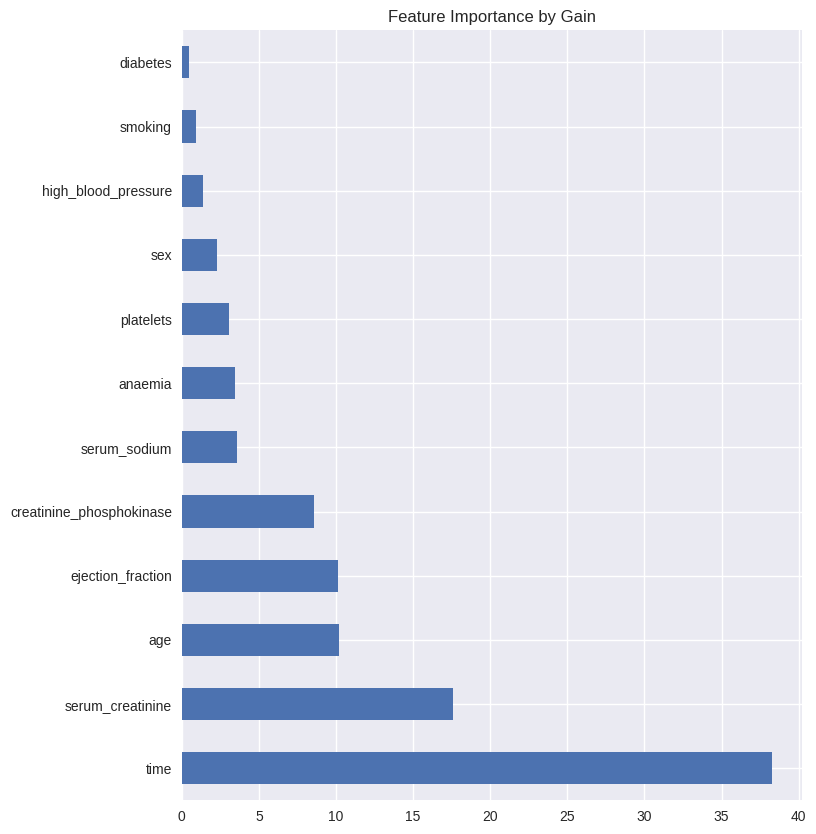

In [ ]:
class CatBoostClassifier_GainFE(CatBoostClassifier):
    @property
    def feature_importances_(self):
        """Override to return feature importances, assuming the model is fitted."""
        try:
            importances = self.get_feature_importance(type='FeatureImportance')
            return importances
        except CatBoostError as e:
            raise CatBoostError('Model must be fitted before feature importances can be accessed.') from e

clf2 = CatBoostClassifier_GainFE(iterations=1000, depth=6,
                                 random_state=314,
                                 silent=True,
                                 eval_metric='AUC',
                                 thread_count=4,
                                 colsample_bylevel=0.9,
                                 subsample=0.9,
                                 learning_rate=0.1)

fit_params = {
    'early_stopping_rounds': 10,
    'eval_set': [(X_test, y_test)],
    'verbose': 100,
}

clf2.fit(X_train, y_train, **fit_params)

feat_imp = pd.Series(clf2.feature_importances_, index=X_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8, 10))
plt.title("Feature Importance by Gain")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


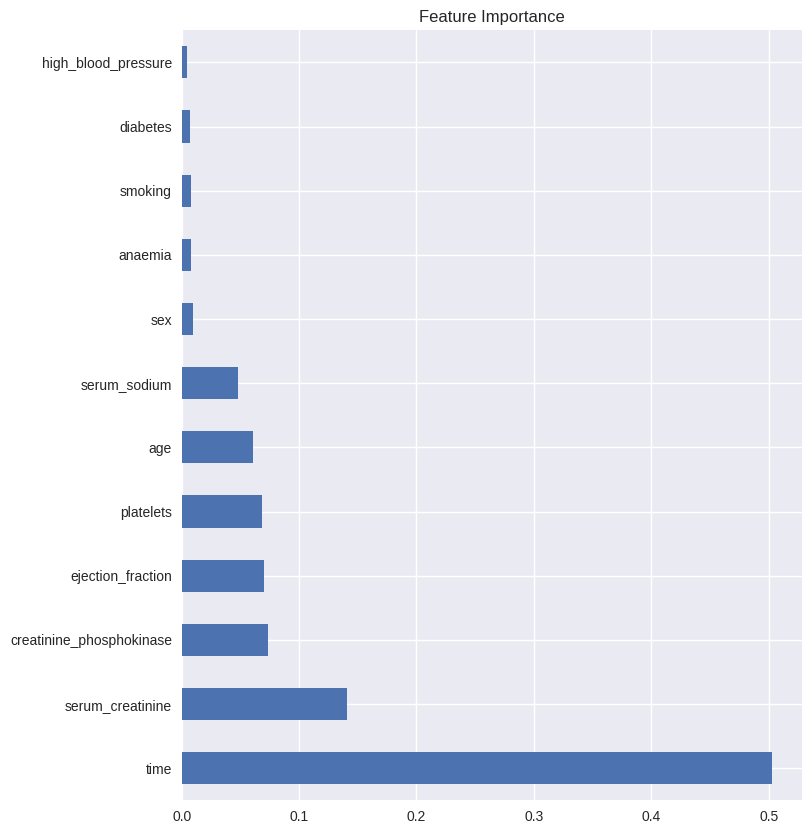

In [ ]:
clf = RandomForestClassifier(n_estimators=1000, random_state=314, n_jobs=4, verbose=1, max_features=0.9)
clf.fit(X_train, y_train)

feat_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8, 10))
plt.title("Feature Importance")
plt.show()

Now that the key features significantly influencing the target column have been identified, I will proceed by selecting only some pivotal features: age, time, serum creatinine, ejection fraction

##Analysis of Significant Features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="age", y="creatinine_phosphokinase", color="DEATH_EVENT",
                 title="Age vs Creatinine Phosphokinase by Death Event",
                 labels={"age": "Age", "creatinine_phosphokinase": "Creatinine Phosphokinase", "DEATH_EVENT": "Death Event"})
fig.show()

In [ ]:
variables = [
    "age",
    "ejection_fraction",
    "serum_creatinine",
    "time",
    "creatinine_phosphokinase"
]
titles = [
    "Distribution of DEATH_EVENT Vs AGE",
    "Distribution of DEATH_EVENT Vs EJECTION FRACTION",
    "Distribution of DEATH_EVENT Vs SERUM CREATININE",
    "Distribution of DEATH_EVENT Vs TIME",
    "Distribution of DEATH_EVENT Vs CREATININE PHOSPHOKINASE"
]

for variable, title in zip(variables, titles):
    fig = px.box(df, x="DEATH_EVENT", y=variable, color="DEATH_EVENT",
                 labels={variable: variable.upper().replace("_", " "), "DEATH_EVENT": "DEATH EVENT"},
                 title=title)

    fig.add_traces(px.strip(df, x="DEATH_EVENT", y=variable, color="DEATH_EVENT").data)
    fig.update_traces(marker=dict(opacity=0.6))
    fig.update_layout(legend_title_text='DEATH EVENT')

    # Displaying the figure
    fig.show()


In cases where the serum creatinine level falls within the range of 0 to 2 mg, a notable trend emerges: the survival rates of patients notably exceed the mortality rates. This observation underscores the significance of serum creatinine levels as a predictive factor in patient outcomes, suggesting that within this particular range, patients tend to experience more favorable health outcomes compared to instances where serum creatinine levels deviate from this range. And, individuals aged between 40 and 70 are inclined to have a higher likelihood of survival.

In [ ]:
sun = pd.pivot_table(df,
                     values='age',
                     index=['sex', 'diabetes', 'smoking', 'anaemia', 'high_blood_pressure', 'DEATH_EVENT'],
                     aggfunc='count').reset_index()

sun.columns = ['sex', 'diabetes', 'smoking', 'anaemia', 'high_blood_pressure', 'DEATH_EVENT', 'count']

sun

,sex,diabetes,smoking,anaemia,high_blood_pressure,DEATH_EVENT,count
0,0,0,0,0,0,0,10
1,0,0,0,0,0,1,5
2,0,0,0,0,1,0,8
3,0,0,0,0,1,1,2
4,0,0,0,1,0,0,11
5,0,0,0,1,0,1,2
6,0,0,0,1,1,0,6
7,0,0,0,1,1,1,4
8,0,0,1,0,1,0,1
9,0,0,1,1,1,1,1


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd

In [ ]:
import plotly.express as px

fig = px.bar(sun,
             x='sex',
             y='count',
             color='DEATH_EVENT',
             barmode='group',
             facet_col='diabetes',
             title="Gender & Diabetes Bar Chart",
             width=600,
             height=600)

fig.show()

In [ ]:
sun['sex'] = sun['sex'].replace({0: "female", 1: "male"})
sun['diabetes'] = sun['diabetes'].replace({0: "no diabetes", 1: "diabetes"})
sun['DEATH_EVENT'] = sun['DEATH_EVENT'].replace({0: "LIVE", 1: "DEATH"})
sun['smoking'] = sun['smoking'].replace({0: "non-smoking", 1: "smoking"})
sun['anaemia'] = sun['anaemia'].replace({0: "no anaemia", 1: "anaemia"})
sun['high_blood_pressure'] = sun['high_blood_pressure'].replace({0: "no high blood pressure", 1: "high blood pressure"})

fig = px.treemap(sun,
                 path=['sex', 'diabetes', 'DEATH_EVENT'],
                 values='count',
                 title="Gender & Diabetes Treemap Chart",
                 width=600,
                 height=600)
fig.show()

fig = px.treemap(sun,
                 path=['sex', 'smoking', 'DEATH_EVENT'],
                 values='count',
                 title="Gender & Smoking Treemap Chart",
                 width=600,
                 height=600)
fig.show()


fig = px.treemap(sun,
                 path=['sex', 'anaemia', 'DEATH_EVENT'],
                 values='count',
                 title="Gender & Anaemia Treemap Chart",
                 width=600,
                 height=600)
fig.show()

fig = px.treemap(sun,
                 path=['sex', 'high_blood_pressure', 'DEATH_EVENT'],
                 values='count',
                 title="Gender & High Blood Pressure Treemap Chart",
                 width=600,
                 height=600)
fig.show()


Across various health indicators such as diabetes, smoking habits, anaemia, and high blood pressure, the dataset consistently demonstrates higher survival rates compared to mortality. However, it's crucial to recognize that while these factors correlate with improved survival outcomes, they do not eliminate associated risks. This underscores the importance of holistic medical assessment and management strategies to address potential risks and optimize patient well-being.

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



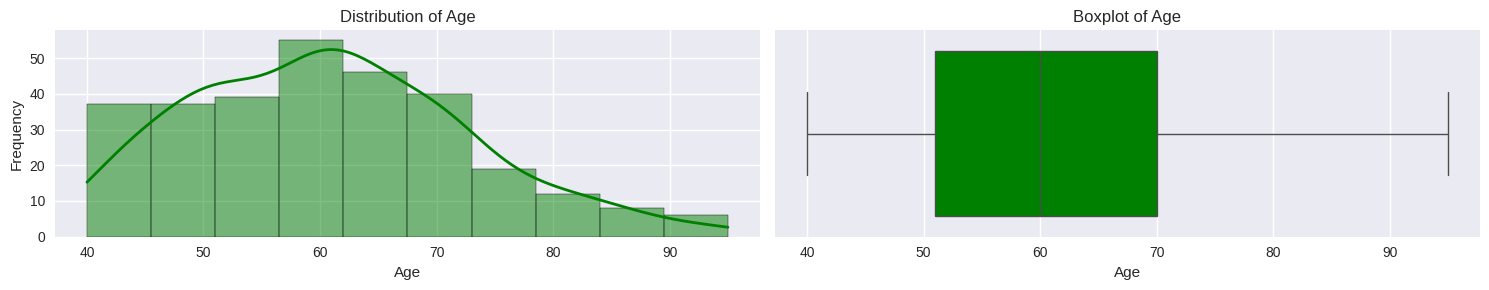

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



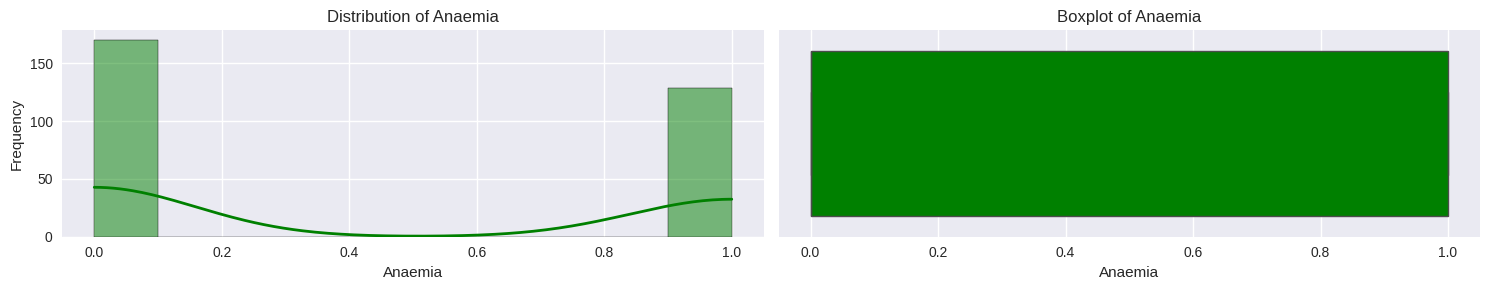

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



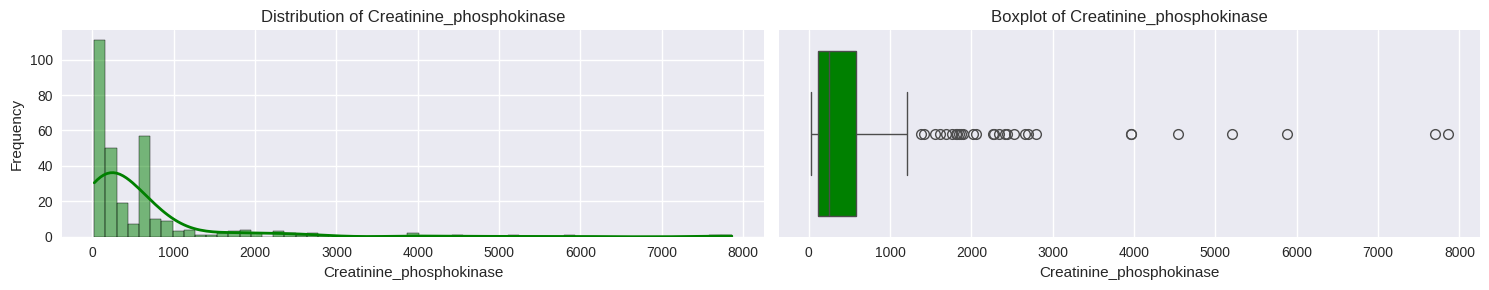

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



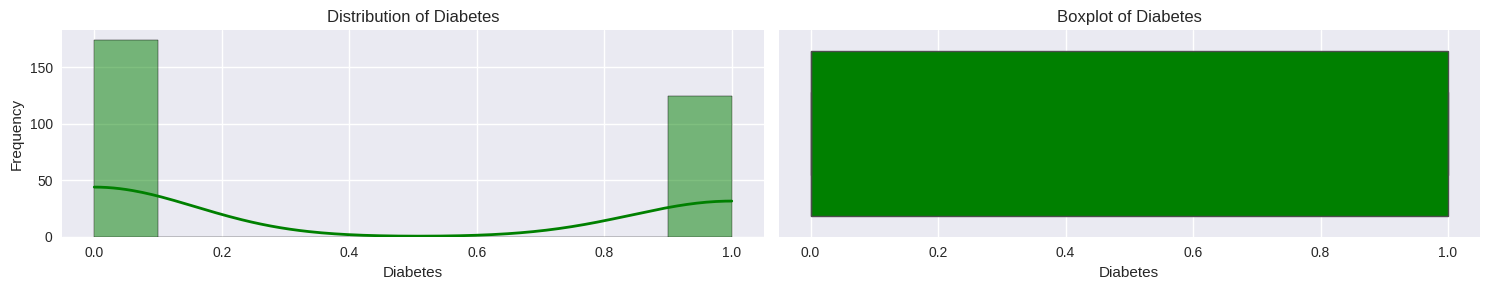

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



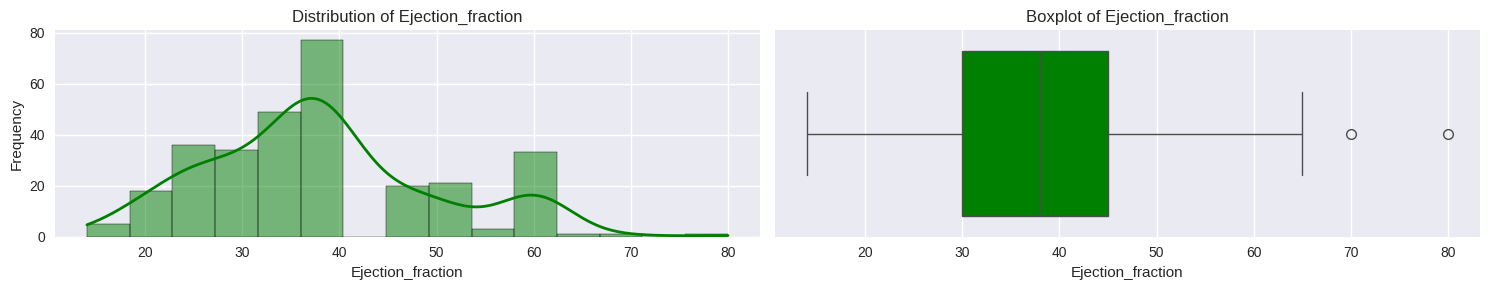

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



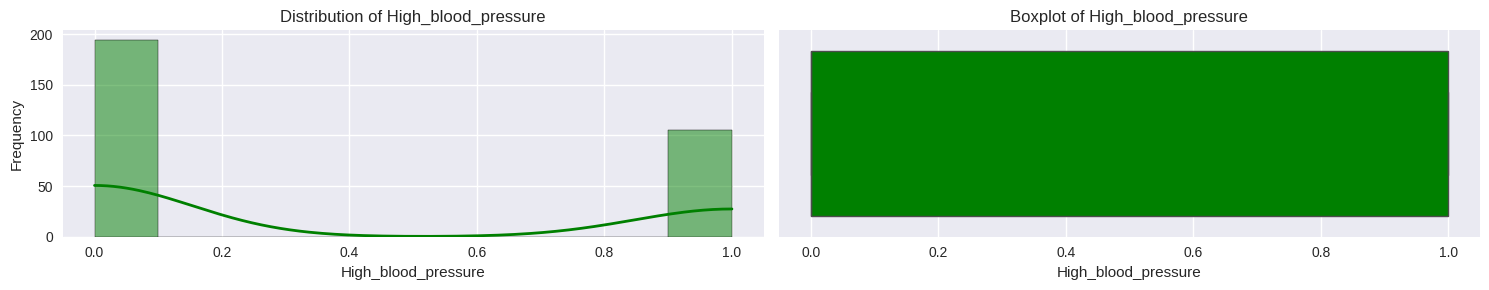

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



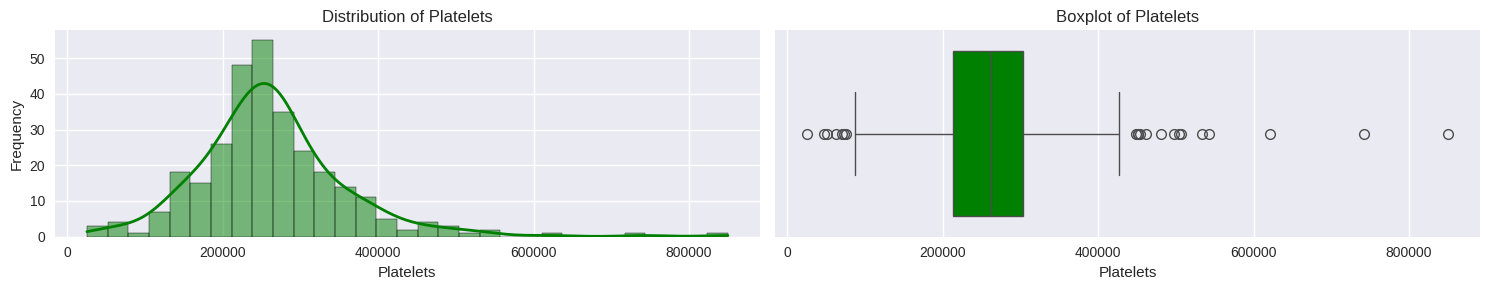

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



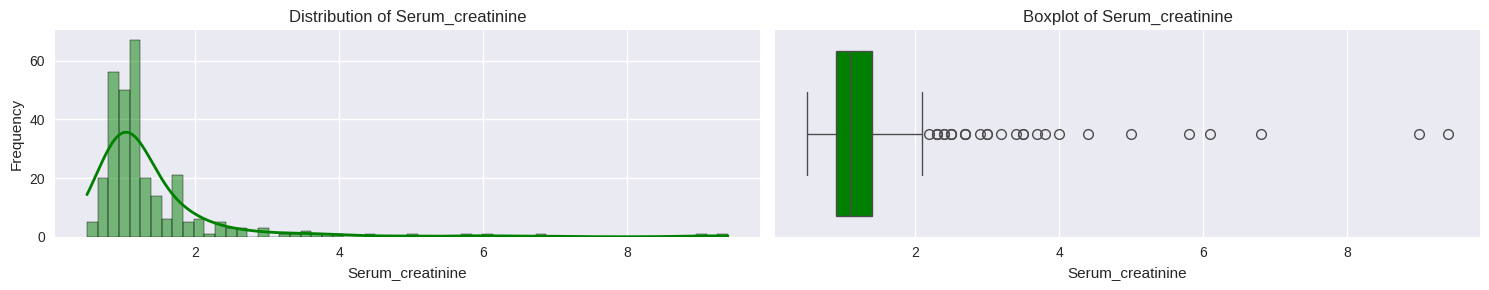

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



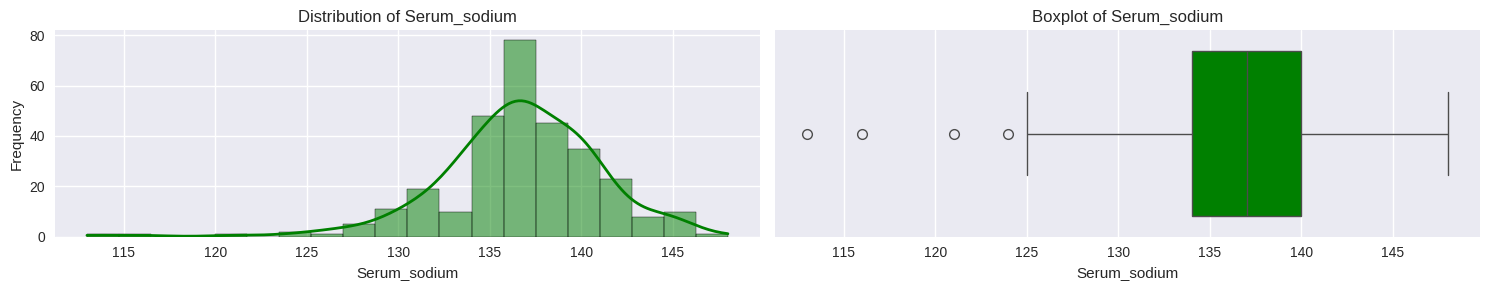

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



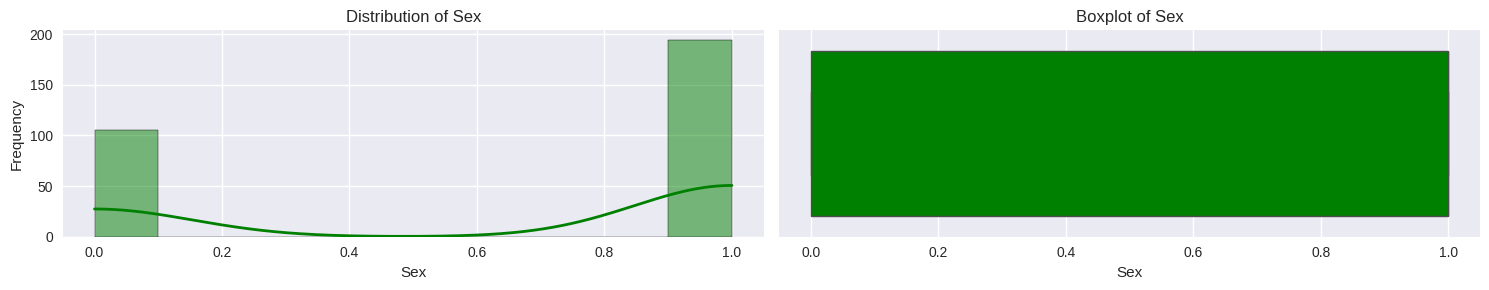

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



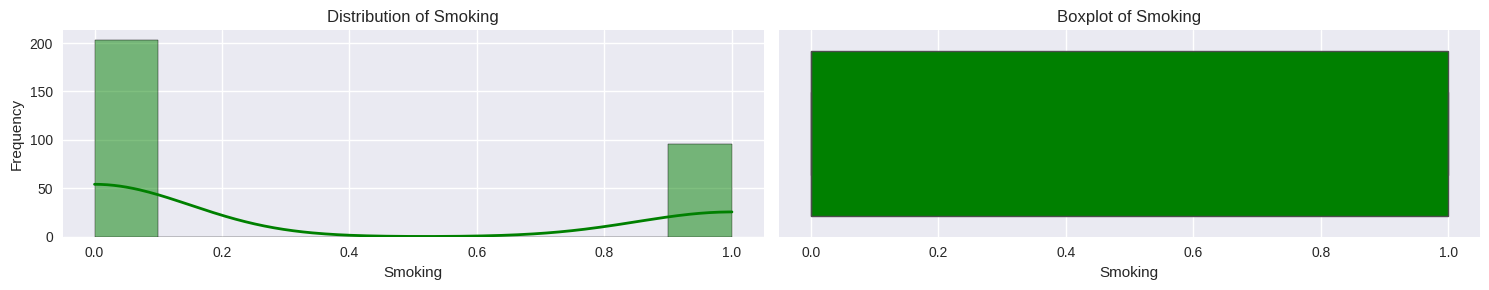

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



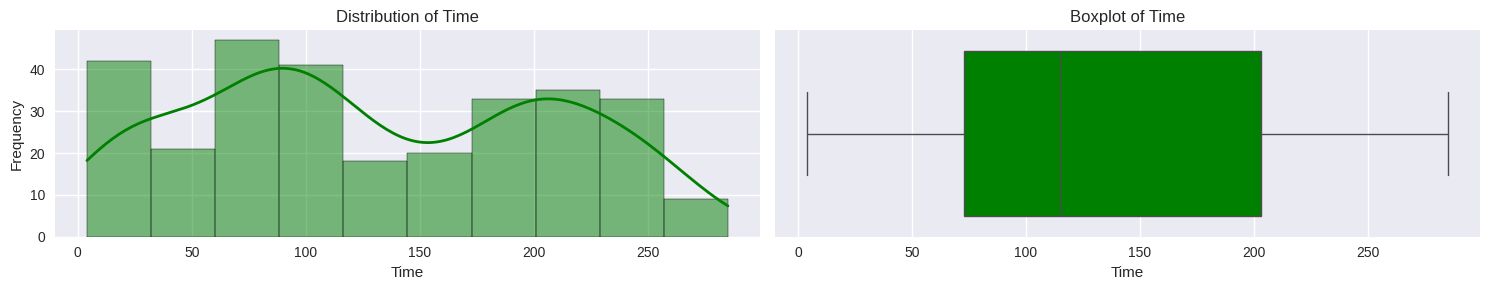

<ipython-input-277-619ac936ca4c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



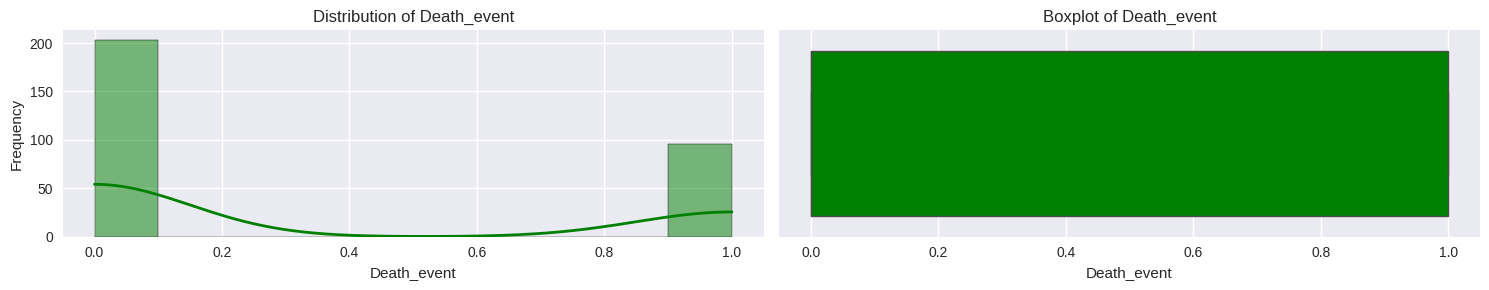

In [ ]:
def plot_distribution_and_boxplot(df, column):
    plt.style.use("seaborn")

    if df[column].dtype != "object":
        plt.figure(figsize=(15, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=column, kde=True, color="green", line_kws={"color": "red", "lw": 2})
        plt.ylabel("Frequency")
        plt.xlabel(column.capitalize())
        plt.title(f"Distribution of {column.capitalize()}")

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=column, boxprops=dict(facecolor="green"))
        plt.xlabel(column.capitalize())
        plt.title(f"Boxplot of {column.capitalize()}")

        plt.tight_layout()
        plt.show()

for column in df.columns:
    plot_distribution_and_boxplot(df, column)

I wanted to examine a results table to understand which features have the most significant impact on mortality. This way, I could gain insight into why conditions like anemia, high blood pressure, diabetes, gender, and smoking seem to have relatively minor effects on death events.

In [ ]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
import plotly.graph_objects as go

anaemia_survived = 120
anaemia_not_survived = 80
no_anaemia_survived = 150
no_anaemia_not_survived = 50

total_anaemia = anaemia_survived + anaemia_not_survived
total_no_anaemia = no_anaemia_survived + no_anaemia_not_survived

perc_anaemia_survived = (anaemia_survived / total_anaemia) * 100
perc_anaemia_not_survived = (anaemia_not_survived / total_anaemia) * 100
perc_no_anaemia_survived = (no_anaemia_survived / total_no_anaemia) * 100
perc_no_anaemia_not_survived = (no_anaemia_not_survived / total_no_anaemia) * 100

fig = go.Figure(data=[
    go.Bar(name='Survived', x=['Anaemia', 'No Anaemia'], y=[anaemia_survived, no_anaemia_survived],
           marker_color='blue', text=[f"{perc_anaemia_survived:.1f}%", f"{perc_no_anaemia_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white')),
    go.Bar(name='Did Not Survive', x=['Anaemia', 'No Anaemia'], y=[anaemia_not_survived, no_anaemia_not_survived],
           marker_color='orange', text=[f"{perc_anaemia_not_survived:.1f}%", f"{perc_no_anaemia_not_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white'))
])

fig.update_layout(barmode='group', title_text="Anaemia's Impact on Heart Disease Patient Outcomes",
                  yaxis_title="Number of Patients", xaxis_title="Patient Group",
                  legend_title="Outcome", plot_bgcolor='black', paper_bgcolor='black',
                  font=dict(color='white'))

fig.show()

In [ ]:
high_blood_pressure_survived = len(df[(df["high_blood_pressure"] == 1) & (df["DEATH_EVENT"] == 0)])
high_blood_pressure_not_survived = len(df[(df["high_blood_pressure"] == 1) & (df["DEATH_EVENT"] == 1)])
no_high_blood_pressure_survived = len(df[(df["high_blood_pressure"] == 0) & (df["DEATH_EVENT"] == 0)])
no_high_blood_pressure_not_survived = len(df[(df["high_blood_pressure"] == 0) & (df["DEATH_EVENT"] == 1)])

total_high_blood_pressure = high_blood_pressure_survived + high_blood_pressure_not_survived
total_no_high_blood_pressure = no_high_blood_pressure_survived + no_high_blood_pressure_not_survived

perc_high_blood_pressure_survived = (high_blood_pressure_survived / total_high_blood_pressure) * 100
perc_high_blood_pressure_not_survived = (high_blood_pressure_not_survived / total_high_blood_pressure) * 100
perc_no_high_blood_pressure_survived = (no_high_blood_pressure_survived / total_no_high_blood_pressure) * 100
perc_no_high_blood_pressure_not_survived = (no_high_blood_pressure_not_survived / total_no_high_blood_pressure) * 100

fig = go.Figure(data=[
    go.Bar(name='Survived', x=['High Blood Pressure', 'No High Blood Pressure'], y=[high_blood_pressure_survived, no_high_blood_pressure_survived],
           marker_color='blue', text=[f"{perc_high_blood_pressure_survived:.1f}%", f"{perc_no_high_blood_pressure_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white')),
    go.Bar(name='Did Not Survive', x=['High Blood Pressure', 'No High Blood Pressure'], y=[high_blood_pressure_not_survived, no_high_blood_pressure_not_survived],
           marker_color='orange', text=[f"{perc_high_blood_pressure_not_survived:.1f}%", f"{perc_no_high_blood_pressure_not_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white'))
])

fig.update_layout(barmode='group', title_text="Impact of High Blood Pressure on Heart Disease Patient Outcomes",
                  yaxis_title="Number of Patients", xaxis_title="Patient Group",
                  legend_title="Outcome", plot_bgcolor='black', paper_bgcolor='black',
                  font=dict(color='white'))

fig.show()


In [ ]:
male_survived = len(df[(df["sex"] == 1) & (df["DEATH_EVENT"] == 0)])
male_not_survived = len(df[(df["sex"] == 1) & (df["DEATH_EVENT"] == 1)])
female_survived = len(df[(df["sex"] == 0) & (df["DEATH_EVENT"] == 0)])
female_not_survived = len(df[(df["sex"] == 0) & (df["DEATH_EVENT"] == 1)])

total_male = male_survived + male_not_survived
total_female = female_survived + female_not_survived

perc_male_survived = (male_survived / total_male) * 100
perc_male_not_survived = (male_not_survived / total_male) * 100
perc_female_survived = (female_survived / total_female) * 100
perc_female_not_survived = (female_not_survived / total_female) * 100

fig = go.Figure(data=[
    go.Bar(name='Survived', x=['Male', 'Female'], y=[male_survived, female_survived],
           marker_color='blue', text=[f"{perc_male_survived:.1f}%", f"{perc_female_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white')),
    go.Bar(name='Did Not Survive', x=['Male', 'Female'], y=[male_not_survived, female_not_survived],
           marker_color='orange', text=[f"{perc_male_not_survived:.1f}%", f"{perc_female_not_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white'))
])

fig.update_layout(barmode='group', title_text="Gender Impact on Survival in Heart Disease Patients",
                  yaxis_title="Number of Patients", xaxis_title="Gender",
                  legend_title="Outcome", plot_bgcolor='black', paper_bgcolor='black',
                  font=dict(color='white'))

fig.show()

In [ ]:
diabetes_survived = len(df[(df["diabetes"] == 1) & (df["DEATH_EVENT"] == 0)])
diabetes_not_survived = len(df[(df["diabetes"] == 1) & (df["DEATH_EVENT"] == 1)])
no_diabetes_survived = len(df[(df["diabetes"] == 0) & (df["DEATH_EVENT"] == 0)])
no_diabetes_not_survived = len(df[(df["diabetes"] == 0) & (df["DEATH_EVENT"] == 1)])

total_diabetes = diabetes_survived + diabetes_not_survived
total_no_diabetes = no_diabetes_survived + no_diabetes_not_survived

perc_diabetes_survived = (diabetes_survived / total_diabetes) * 100
perc_diabetes_not_survived = (diabetes_not_survived / total_diabetes) * 100
perc_no_diabetes_survived = (no_diabetes_survived / total_no_diabetes) * 100
perc_no_diabetes_not_survived = (no_diabetes_not_survived / total_no_diabetes) * 100

fig = go.Figure(data=[
    go.Bar(name='Survived', x=['Diabetes', 'No Diabetes'], y=[diabetes_survived, no_diabetes_survived],
           marker_color='blue', text=[f"{perc_diabetes_survived:.1f}%", f"{perc_no_diabetes_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white')),
    go.Bar(name='Did Not Survive', x=['Diabetes', 'No Diabetes'], y=[diabetes_not_survived, no_diabetes_not_survived],
           marker_color='orange', text=[f"{perc_diabetes_not_survived:.1f}%", f"{perc_no_diabetes_not_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white'))
])

fig.update_layout(barmode='group', title_text="Impact of Diabetes on Survival in Heart Disease Patients",
                  yaxis_title="Number of Patients", xaxis_title="Patient Group",
                  legend_title="Outcome", plot_bgcolor='black', paper_bgcolor='black',
                  font=dict(color='white'))

fig.show()

In [ ]:
smoking_survived = len(df[(df["smoking"] == 1) & (df["DEATH_EVENT"] == 0)])
smoking_not_survived = len(df[(df["smoking"] == 1) & (df["DEATH_EVENT"] == 1)])
no_smoking_survived = len(df[(df["smoking"] == 0) & (df["DEATH_EVENT"] == 0)])
no_smoking_not_survived = len(df[(df["smoking"] == 0) & (df["DEATH_EVENT"] == 1)])

total_smoking = smoking_survived + smoking_not_survived
total_no_smoking = no_smoking_survived + no_smoking_not_survived

perc_smoking_survived = (smoking_survived / total_smoking) * 100
perc_smoking_not_survived = (smoking_not_survived / total_smoking) * 100
perc_no_smoking_survived = (no_smoking_survived / total_no_smoking) * 100
perc_no_smoking_not_survived = (no_smoking_not_survived / total_no_smoking) * 100

fig = go.Figure(data=[
    go.Bar(name='Survived', x=['Smoking', 'No Smoking'], y=[smoking_survived, no_smoking_survived],
           marker_color='blue', text=[f"{perc_smoking_survived:.1f}%", f"{perc_no_smoking_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white')),
    go.Bar(name='Did Not Survive', x=['Smoking', 'No Smoking'], y=[smoking_not_survived, no_smoking_not_survived],
           marker_color='orange', text=[f"{perc_smoking_not_survived:.1f}%", f"{perc_no_smoking_not_survived:.1f}%"],
           textposition='outside', textfont=dict(color='white'))
])

fig.update_layout(barmode='group', title_text="Impact of Smoking on Survival in Heart Disease Patients",
                  yaxis_title="Number of Patients", xaxis_title="Patient Group",
                  legend_title="Outcome", plot_bgcolor='black', paper_bgcolor='black',
                  font=dict(color='white'))

fig.show()

Even if none of the aforementioned features are present in the patient, their survival rate remains higher, indicating that these factors do not significantly affect the occurrence of the death event.